In [1]:
# https://wikidocs.net/63618
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

import torchvision
from torchvision import transforms, datasets
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torchvision.io import read_image



import torch.nn.init
from ast import increment_lineno

from PIL import Image
import matplotlib
import matplotlib.pyplot as plt


import torch.nn as nn
import torch.nn.functional as F

import os
import pandas as pd

import cv2


In [2]:
# 2. 딥러닝 모델 설계할 때 활용하는 장비 확인
if torch.cuda.is_available():
     DEVICE=torch.device('cuda')
else:
     DEVICE=torch.device('cpu')

print('Using Pytorch version:',torch.__version__,'Device:',DEVICE)

Using Pytorch version: 1.11.0 Device: cuda


In [3]:
learning_rate = 0.001
training_epochs = 15
batch_size = 32

In [4]:
class CustomImageDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(csv_file)         # annotation_file을 csv_file로 바꿈
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 1])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 0]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        if self.transform:
            sample = {'image': image, 'label': label}
        
        return sample
    
        

In [5]:
train_data = CustomImageDataset("../train.csv",
                                   ".././Taekwondo/DataSet/train_/",
                                   transform=transforms.Compose([transforms.Resize((32,32)),
                            transforms.ToPILImage(),transforms.ToTensor(),
                            transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                            ]))
test_data = CustomImageDataset("../test.csv",
                               ".././Taekwondo/DataSet/test_/",
                               transform=transforms.Compose([transforms.Resize((32,32)),
                            transforms.ToPILImage(),transforms.ToTensor(),
                            transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                            ]))


In [6]:
# 이미지, 라벨 출력용
train_data[0]
train_data[1]
train_data[0]

{'image': tensor([[[-0.0824, -0.0824, -0.0745,  ..., -0.0196, -0.0667, -0.1451],
          [-0.0745, -0.0353, -0.0353,  ..., -0.0275, -0.1137, -0.1137],
          [-0.0118,  0.0039,  0.0118,  ..., -0.0745, -0.0588, -0.0118],
          ...,
          [-0.0353, -0.0510,  0.0039,  ..., -0.0510, -0.0275, -0.0588],
          [-0.0196, -0.0118, -0.0353,  ..., -0.0431, -0.0353, -0.0745],
          [-0.0902, -0.0353, -0.0118,  ..., -0.0275, -0.0510, -0.0431]],
 
         [[ 0.0039, -0.0196, -0.0118,  ...,  0.0588,  0.0118, -0.0353],
          [ 0.0118,  0.0275,  0.0275,  ...,  0.0510, -0.0196, -0.0196],
          [ 0.0745,  0.0667,  0.0745,  ...,  0.0039,  0.0196,  0.0824],
          ...,
          [ 0.0667,  0.0510,  0.0980,  ...,  0.0353,  0.0588,  0.0275],
          [ 0.0824,  0.0902,  0.0588,  ...,  0.0431,  0.0667,  0.0118],
          [ 0.0118,  0.0588,  0.0824,  ...,  0.0588,  0.0353,  0.0588]],
 
         [[-0.1059, -0.1059, -0.0980,  ..., -0.0039, -0.0510, -0.1373],
          [-0.0980,

In [7]:
# train_data 개수와 크기
print(len(train_data))
for i in range(len(train_data)):
    sample = train_data[i]
    print(i,sample['image'].size(),sample['label'])
    if i == 10:
          break

3931
0 torch.Size([3, 32, 32]) 0
1 torch.Size([3, 32, 32]) 0
2 torch.Size([3, 32, 32]) 0
3 torch.Size([3, 32, 32]) 0
4 torch.Size([3, 32, 32]) 0
5 torch.Size([3, 32, 32]) 0
6 torch.Size([3, 32, 32]) 0
7 torch.Size([3, 32, 32]) 0
8 torch.Size([3, 32, 32]) 0
9 torch.Size([3, 32, 32]) 0
10 torch.Size([3, 32, 32]) 0


In [4]:
# 데이터 전처리화
# https://data-panic.tistory.com/13
# https://tutorials.pytorch.kr/beginner/data_loading_tutorial.html
# 하위 폴더가 존재해야 함. 하위 폴더 만들어보자(0~7)

root = ".././Taekwondo/DataSet/train_Image"
test_root = ".././Taekwondo/DataSet/test_Image"

trans = transforms.Compose([transforms.Resize((32,32)),
                            transforms.ToTensor(),
                            ])

tests = transforms.Compose([transforms.Resize((32,32)),
                            transforms.ToTensor(),
                            ])

test_dataset = torchvision.datasets.ImageFolder(root = test_root,
                                           transform = tests)

trainset = torchvision.datasets.ImageFolder(root = root,
                                           transform = trans)

train_loader = torch.utils.data.DataLoader(dataset=trainset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)


X_train: torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
Y_train: torch.Size([32]) type: torch.LongTensor


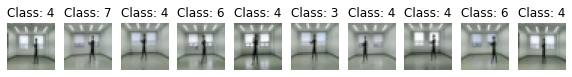

In [5]:
# 5. 데이터 확인하기
for(X_train,Y_train)in train_loader:
    print('X_train:',X_train.size(),'type:', X_train.type())
    print('Y_train:',Y_train.size(),'type:', Y_train.type())
    break

pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)     # 여러 그래프 그리기, 첫숫자 : 행, 둘째 : 열
    plt.axis('off')           # 축없음
    plt.imshow(np.transpose(X_train[i],(1,2,0)))
    plt.title('Class: ' + str(Y_train[i].item()))
# imshow : 이미지 출력

In [10]:
# 데이터 전처리화 테스트
print(len(trainset))
trainset.__getitem__(3000)

3936


(tensor([[[0.4863, 0.4941, 0.4980,  ..., 0.5255, 0.4941, 0.4314],
          [0.4980, 0.5059, 0.5098,  ..., 0.5098, 0.4471, 0.4510],
          [0.4863, 0.5255, 0.5373,  ..., 0.4667, 0.4824, 0.5373],
          ...,
          [0.5608, 0.5765, 0.5843,  ..., 0.5490, 0.5490, 0.5412],
          [0.5608, 0.5725, 0.5765,  ..., 0.5490, 0.5412, 0.5373],
          [0.5529, 0.5647, 0.5765,  ..., 0.5529, 0.5412, 0.5333]],
 
         [[0.5294, 0.5255, 0.5294,  ..., 0.5647, 0.5373, 0.4784],
          [0.5373, 0.5373, 0.5412,  ..., 0.5490, 0.4902, 0.4941],
          [0.5255, 0.5569, 0.5686,  ..., 0.5059, 0.5255, 0.5765],
          ...,
          [0.6078, 0.6118, 0.6157,  ..., 0.5922, 0.5922, 0.5843],
          [0.6039, 0.6118, 0.6118,  ..., 0.5922, 0.5843, 0.5804],
          [0.6000, 0.6039, 0.6118,  ..., 0.5961, 0.5843, 0.5765]],
 
         [[0.4824, 0.4824, 0.4863,  ..., 0.5333, 0.4941, 0.4314],
          [0.4863, 0.4941, 0.4980,  ..., 0.5176, 0.4510, 0.4549],
          [0.4745, 0.5137, 0.5255,  ...,

In [11]:
classes = trainset.classes
classes

['A01', 'A04', 'A05', 'A06', 'A07', 'A08', 'A10', 'A14']

In [12]:
#train_loader = torch.utils.data.DataLoader(dataset=train_data,
#                                          batch_size=batch_size,
#                                          shuffle=True,
#                                          drop_last=True)

In [13]:
# DataLoader(torch.utils.data.DataLodaer) 설명
# https://acdongpgm.tistory.com/233
# 데이터의 접근하려면 python 의 내장함수 iter 와 next 을 사용하여 접근할 수 있다.
# train_features, train_labels = next(iter(train_loader))
#
# train_loader                       # 

# print(train_features[0])           
# train_labels[0]                    # 라벨링 보여주기
# print(train_features[0].shape)
# 채널 3, 가로 
# torch.Tensor(1,3,32,32)

In [14]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        # L1 ImgIn shape=(?, 32, 32, 3)
        #    ImgIn shape=(?, height, width, channel)
        #    Conv     -> (?, 32, 32, 32)
        #    Pool     -> (?, 16, 16, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            # 입력채널 3, 출력 채널 32, 
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L2 ImgIn shape=(?, 16, 16, 32)
        #    Conv      ->(?, 16, 16, 64)
        #    Pool      ->(?, 8, 8, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L3 ImgIn shape=(?, 8, 8, 64)
        #    Conv      ->(?, 8, 8, 128)
        #    Pool      ->(?, 4, 4, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

        # L4 FC 4x4x128 inputs -> 625 outputs
        self.fc1 = torch.nn.Linear(3200, 625, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        # L5 Final FC 625 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(625, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

In [15]:
# CNN 모델 정의
model = CNN().to(DEVICE) 
model
test_input = torch.Tensor(1,3,32,32) # batchsize, RGB channel, W, H

# test_out = CNN(test_input)
# TypeError: __init__() takes 1 positional argument but 2 were given
# __init__은 매개변수가 1개인데 2개를 줬다. 

In [16]:
criterion = torch.nn.CrossEntropyLoss().to(DEVICE)     # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [17]:
total_batch = len(train_loader)
print('총 배치의 수 : {}'.format(total_batch))

# (batch_size, total_batch)
# (100, 39)
# (10, 393)
# (16, 245)

총 배치의 수 : 123


In [18]:
# 타입 테스트 용
# for (X, Y) in train_loader:
#     print(X.type())

In [22]:
for epoch in range(5):
    avg_cost = 0.0

    for X, Y in train_loader: 
        # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y는 레이블.
        # image is already size of (32x32), no reshape
        # label is not one-hot encoded
        X = X.to(DEVICE).float()               # float() 붙이니까 해결
        Y = Y.to(DEVICE)              # float() 붙이니까 해결

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))
    
for e in range(5):
    for images, labels in train_loader:   
        if torch.cuda.is_available():
            images, labels = images.cuda(), labels.cuda()   

[Epoch:    1] cost = 2.08271766
[Epoch:    2] cost = 2.08204794
[Epoch:    3] cost = 2.08280373
[Epoch:    4] cost = 2.08259034
[Epoch:    5] cost = 2.0820179


In [ ]:
# 오류 보고서
# case 1 
#  self.layer1 = torch.nn.Sequential(
#             torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
# Given groups=1, weight of size [32, 1, 3, 3], expected input[100, 3, 424, 776] to have 1 channels, but got 3 channels instead
# 이 오류는 우리가 1 채널만 필요한데 3채널을 줬다는 뜻이다. 
# 참조 링크 : https://discuss.pytorch.org/t/runtimeerror-given-groups-1-weight-64-3-3-3-so-expected-input-16-64-256-256-to-have-3-channels-but-got-64-channels-instead/12765

# case 2 
#  self.layer1 = torch.nn.Sequential(
#             torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
# Input type (torch.cuda.ByteTensor) and weight type (torch.cuda.FloatTensor) should be the same
# 자료형 안맞음, float로 해결 가능

# case 3
#  학습시키는 블록에 다음을 수정했다.
#         X = X.to(DEVICE).float()
#         Y = Y.to(DEVICE).float()
# 오류코드는 다음과 같다.
# CUDA out of memory. Tried to allocate 3.92 GiB (GPU 0; 6.00 GiB total capacity; 
# 4.48 GiB already allocated; 0 bytes free; 4.50 GiB reserved in total by PyTorch) 
# If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  
# See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF
# 메모리가 부족하다고 뜬다. 

# case 4(case 3 적용한 상태)
# batch_size 바꿔보기. batch_size = 10
# 그런데 총 배치의 수 : 393 가 떴다. 원래는 39였는데... 뭔가 불안
# RuntimeError >> mat1 and mat2 shapes cannot be multiplied (10x677376 and 2048x625)
# https://stackoverflow.com/questions/68447264/pytorch-mat1-and-mat2-shapes-cannot-be-multiplied

# case 5




In [ ]:
test_loader = torch.utils.data.DataLoader(dataset=trainset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [31]:
# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    X_test = test_data.view(len(test_data), 3, 32, 32).float().to(DEVICE)
    Y_test = test_data

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

AttributeError: 'CustomImageDataset' object has no attribute 'view'